##### Installation of Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Path for the journal bearing dataset
df = pd.read_csv('../journal_bearing.csv')
header = ['speed', 'eccentricity', 'load', 'axial_pos', 'angular_pos', 'thickness', 'pressure']
df.columns = header
zero_pressure_condition = (df['angular_pos']<-2.7) | (df['angular_pos']>1.37)
df = df[~zero_pressure_condition]
# Choose values of eccentricity between 0.3, 0.7 (Knowledge pruning)
df = df[df['eccentricity'].between(0.3, 0.7)]
#df = df.drop(columns=['eccentricity', 'thickness'])
df

,speed,eccentricity,load,axial_pos,angular_pos,thickness,pressure
2856028,209.439510,0.304991,2379.22,0.000000,-2.686062,0.000143,0.0
2856029,209.439510,0.304991,2379.22,0.000000,-2.670354,0.000143,0.0
2856030,209.439510,0.304991,2379.22,0.000000,-2.654646,0.000143,0.0
2856031,209.439510,0.304991,2379.22,0.000000,-2.638938,0.000144,0.0
2856032,209.439510,0.304991,2379.22,0.000000,-2.623230,0.000144,0.0
...,...,...,...,...,...,...,...
35495882,1047.197551,0.699978,58880.20,0.038974,1.303761,0.000045,0.0
35495883,1047.197551,0.699978,58880.20,0.038974,1.319469,0.000045,0.0
35495884,1047.197551,0.699978,58880.20,0.038974,1.335177,0.000046,0.0
35495885,1047.197551,0.699978,58880.20,0.038974,1.350885,0.000046,0.0


## 1) Description of columns

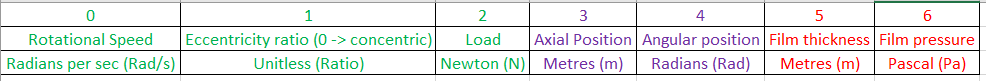

## 2) Duplicates

In [3]:
## Duplicates test
print(f"Number of duplicates: {sum(df.duplicated())}")
df.describe()

Number of duplicates: 0


,speed,eccentricity,load,axial_pos,angular_pos,thickness,pressure
count,2.113440e+07,2.113440e+07,2.113440e+07,2.113440e+07,2.113440e+07,2.113440e+07,2.113440e+07
mean,6.283185e+02,5.674825e-01,2.129145e+04,1.948718e-02,-6.597345e-01,1.190890e-04,1.567528e+06
std,2.565100e+02,9.368765e-02,1.159820e+04,1.182827e-02,1.174426e+00,5.217288e-05,2.366849e+06
min,2.094395e+02,3.049906e-01,2.379220e+03,0.000000e+00,-2.686062e+00,3.525254e-05,0.000000e+00
25%,4.188790e+02,5.207339e-01,1.192127e+04,9.743590e-03,-1.680752e+00,6.664631e-05,2.571315e+04
50%,6.283185e+02,5.804821e-01,1.935090e+04,1.948718e-02,-6.597345e-01,1.220132e-04,5.798575e+05
75%,8.377580e+02,6.402303e-01,2.854928e+04,2.923077e-02,3.612832e-01,1.704605e-04,2.080645e+06
max,1.047198e+03,6.999784e-01,5.888020e+04,3.897436e-02,1.366593e+00,1.997475e-04,2.156316e+07


## 3) Visualizing Angular position vs Pressure

<AxesSubplot:xlabel='angular_pos', ylabel='pressure'>

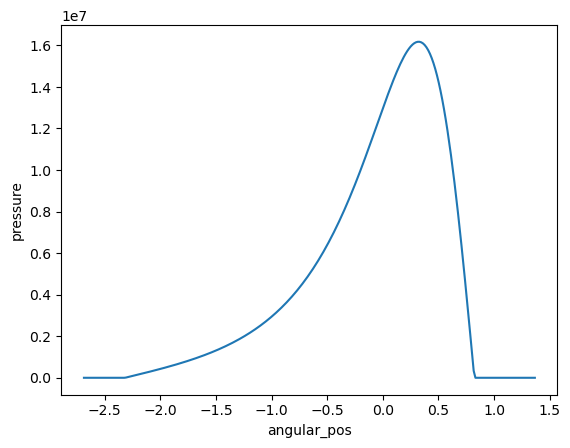

In [4]:
condition = (df['speed']==785.3981633974483) & (df['eccentricity']==0.6999784106132629)
constant_axial_cond = (df['axial_pos']==0.0389743589743589)
sns.lineplot(data=df[condition & constant_axial_cond], x='angular_pos', y='pressure')
#plt.savefig('../Images/angular_pressure.png', dpi=300, bbox_inches='tight')

## Image provided by Samuel Cartwright
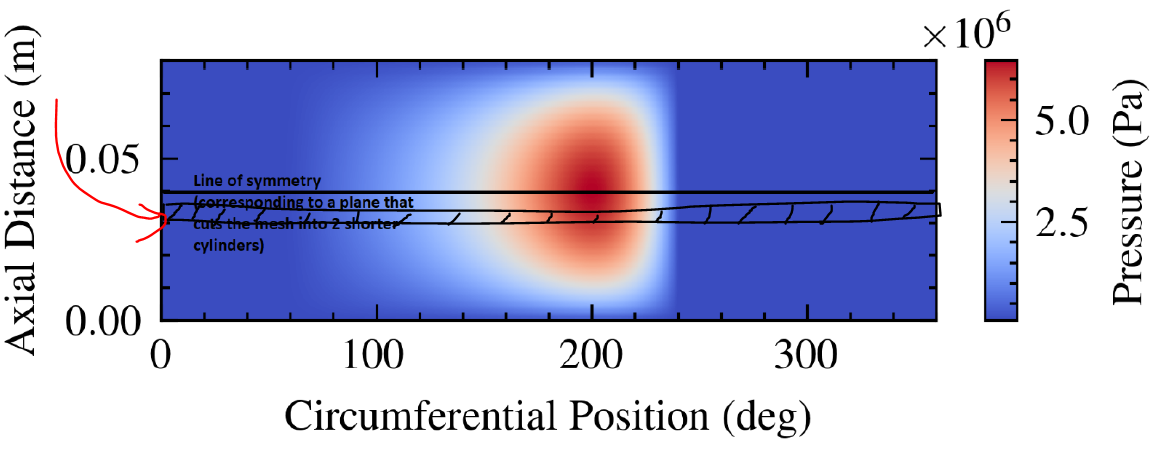

## 4) Visualizing Axial position vs Pressure

<AxesSubplot:xlabel='axial_pos', ylabel='pressure'>

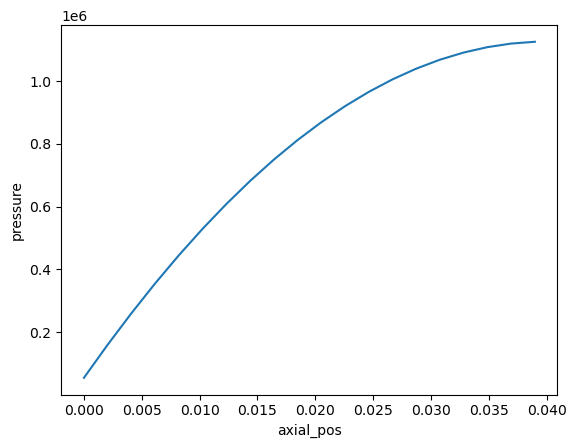

In [5]:
constant_angular_cond = (df['angular_pos']==-1.5865042900628454)
sns.lineplot(data=df[condition & constant_angular_cond], x='axial_pos', y='pressure')
#plt.savefig('../Images/axial_pressure.png', dpi=300, bbox_inches='tight')

## Image provided by Samuel Cartwright
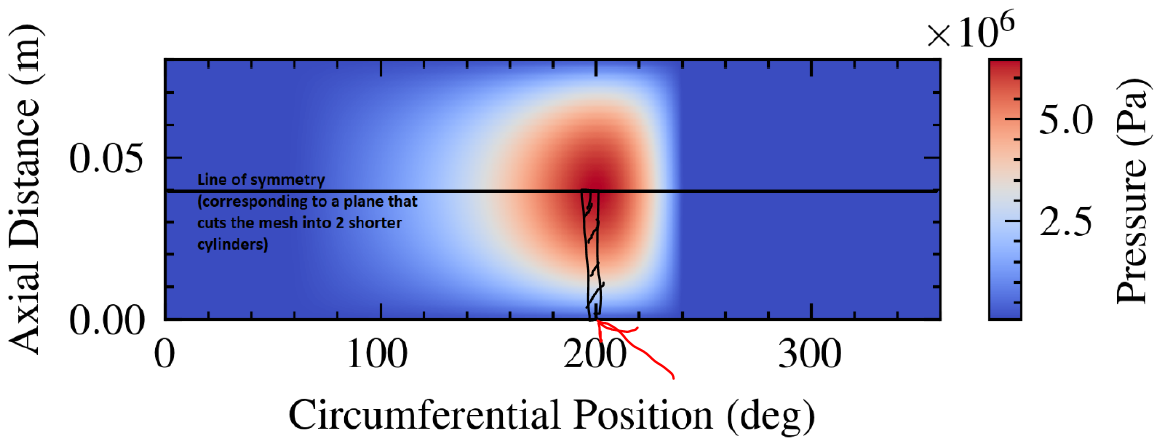

### (Observation) Any angular position less than -2.7 and greater than 1.37 have pressure of 0 Irrespective of its speed, eccentricity, load or axial position

In [6]:
print('Description of all angular positions at 0 values pressure')
print(df[df['pressure']==0]['angular_pos'].describe())
print('=============================================================')
print('Description of all angular positions at NON 0 values pressure')
print(df[df['pressure']!=0]['angular_pos'].describe())
print('=============================================================')
#Confirmation of the angular pos value
print(df[(df['angular_pos']<-2.7) | (df['angular_pos']>1.37)]['angular_pos'].describe())
print('There is only pressure value of 0 at angular pos less than -2.7 and greater than 1.37 ')
print(f"The only pressure value present for all angular positions less than -2.7 and greater than 1.37: {df[(df['angular_pos']<-2.7) | (df['angular_pos']>1.37)]['pressure'].unique()}")
print(f"Total Unique Pressure values present at angular positions less than -2.7 and greater than 1.37: {len(df[(df['angular_pos']<-2.7) | (df['angular_pos']>1.37)]['pressure'].unique())}")

Description of all angular positions at 0 values pressure
count    4.812959e+06
mean    -9.023858e-01
std      1.776289e+00
min     -2.686062e+00
25%     -2.466150e+00
50%     -2.214823e+00
75%      1.130973e+00
max      1.366593e+00
Name: angular_pos, dtype: float64
Description of all angular positions at NON 0 values pressure
count    1.632144e+07
mean    -5.881801e-01
std      9.127431e-01
min     -2.309071e+00
25%     -1.366593e+00
50%     -5.811946e-01
75%      2.042035e-01
max      1.256637e+00
Name: angular_pos, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: angular_pos, dtype: float64
There is only pressure value of 0 at angular pos less than -2.7 and greater than 1.37 
The only pressure value present for all angular positions less than -2.7 and greater than 1.37: []
Total Unique Pressure values present at angular positions less than -2.7 and greater than 1.37: 0


## 5) Pressure values at different eccentricities

<AxesSubplot:xlabel='angular_pos', ylabel='pressure'>

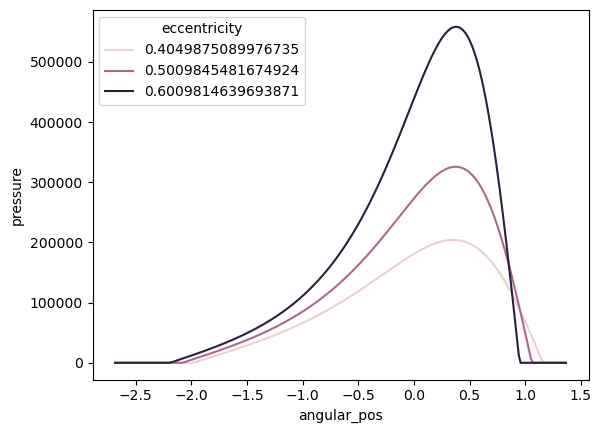

In [7]:
special_cond = (df['speed'] == 785.3981633974483) & (df['axial_pos'] == 0.0)
df_special = df[special_cond & df['eccentricity'].isin([0.4049875089976735, 0.5009845481674924, 0.6009814639693871, 0.7009783797712819])]
sns.lineplot(data=df_special, x='angular_pos', y='pressure', hue='eccentricity')

## 6) Pressure values at different speeds

<AxesSubplot:xlabel='angular_pos', ylabel='pressure'>

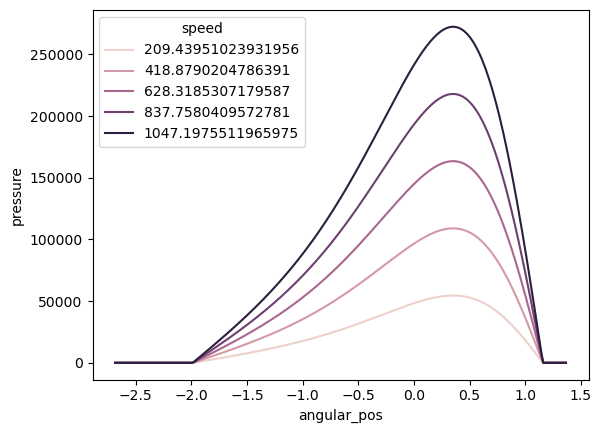

In [8]:
special_cond2 = (df['eccentricity'] == 0.4049875089976735) & (df['axial_pos'] == 0.0)
df_special2 = df[special_cond2 & df['speed'].isin([209.43951023931956, 418.8790204786391, 628.3185307179587, 837.7580409572781, 1047.1975511965975])]
sns.lineplot(data=df_special2, x='angular_pos', y='pressure', hue='speed')

## 7) Visualization of Meshes

<AxesSubplot:xlabel='speed_rpm', ylabel='eccentricity'>

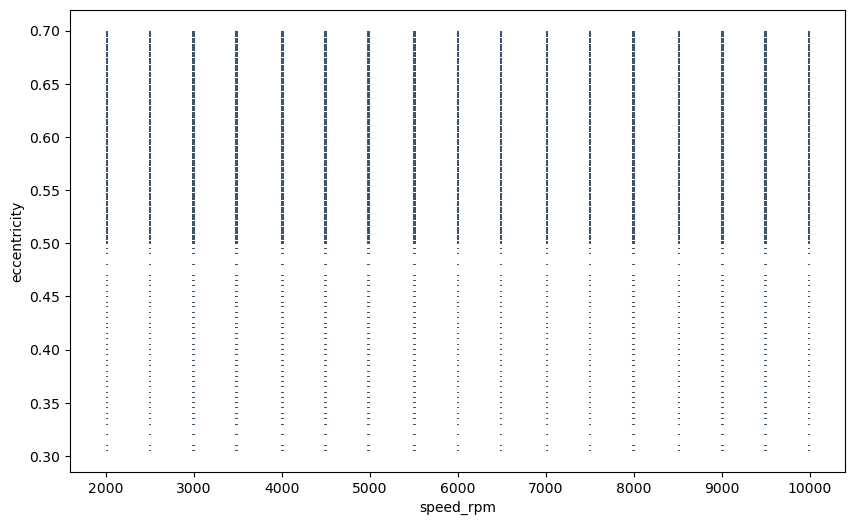

In [10]:
import math
sub = df
# Convert speed to rpm
sub['speed_rpm'] = sub['speed'] * (60 / (2 * math.pi))
plt.figure(figsize=[10, 6])
# Speed vs eccentricity values
sns.histplot(x=df['speed_rpm'], y=df['eccentricity'])
#plt.savefig('Images/Mesh.png', dpi=300, bbox_inches='tight')

# 8) Contour plot of pressure for axial and angular positions (After preprocessing)

Locator attempting to generate 8088 ticks ([0.0, ..., 16174000.0]), which exceeds Locator.MAXTICKS (1000).


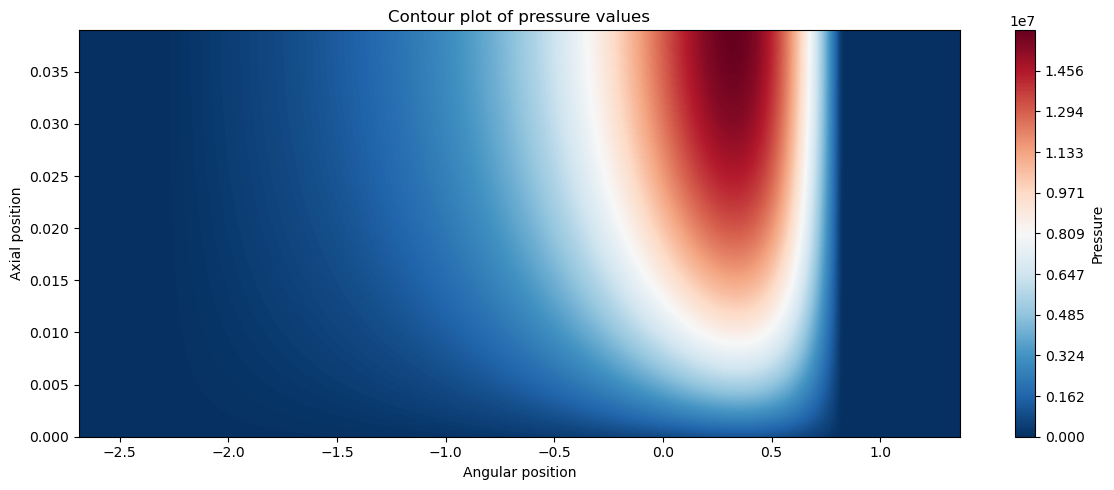

In [11]:
import numpy as np
import matplotlib.pyplot as plt

comb1 = df[condition]
# Sample data
x = comb1['angular_pos'].values
y = comb1['axial_pos'].values
z = comb1['pressure'].values


plt.figure(figsize=(12, 5))

# Create a filled contour plot using tricontourf
contour = plt.tricontourf(x, y, z, cmap='RdBu_r', levels=10000)

# Add a colorbar
plt.colorbar(contour, label="Pressure")

plt.title('Contour plot of pressure values')
plt.xlabel('Angular position')
plt.ylabel('Axial position')

plt.tight_layout()
#plt.savefig("../Images/pressure_contour.png")
plt.show()

## This graph is a contour plot of pressure before filtering the zero-region pressure

Locator attempting to generate 8088 ticks ([0.0, ..., 16174000.0]), which exceeds Locator.MAXTICKS (1000).


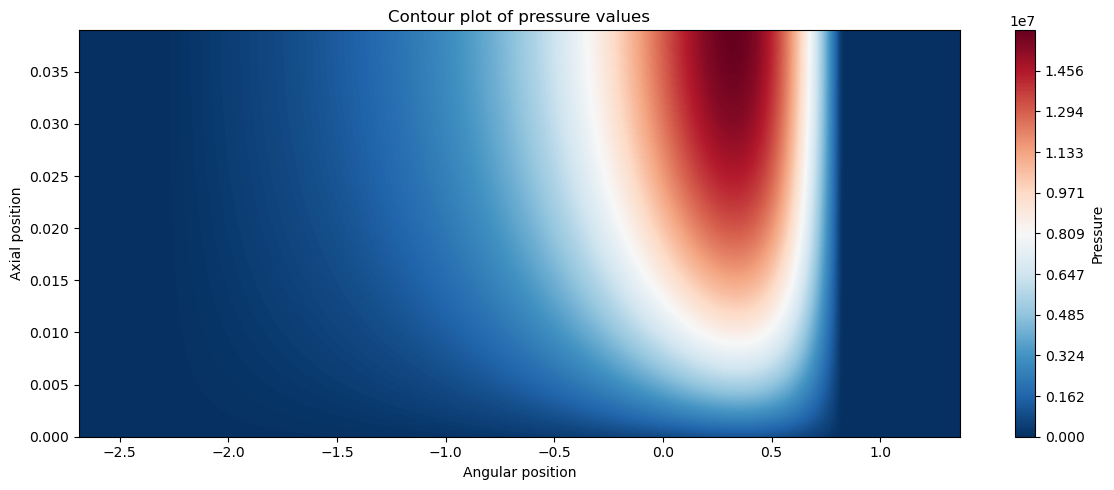

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = comb1['angular_pos'].values
y = comb1['axial_pos'].values
z = comb1['pressure'].values


plt.figure(figsize=(12, 5))

# Create a filled contour plot using tricontourf
contour = plt.tricontourf(x, y, z, cmap='RdBu_r', levels=10000)

# Add a colorbar
plt.colorbar(contour, label="Pressure")

plt.title('Contour plot of pressure values')
plt.xlabel('Angular position')
plt.ylabel('Axial position')

plt.tight_layout()
#plt.savefig("Images/pressure_contour.png")
plt.show()

In [ ]:
"""import matplotlib.pyplot as plt

combinations = [comb1, comb2, comb3]
filenames = ["Images/contour_theta_axial_1.png", "Images/contour_theta_axial_2.png", "Images/contour_theta_axial_3.png"]

for comb, fname in zip(combinations, filenames):
    x = comb['angular_pos'].values
    y = comb['axial_pos'].values
    z = comb['pressure'].values
    plt.figure(figsize=(12, 5))
    contour = plt.tricontourf(x, y, z, cmap='RdBu_r', levels=10000, extend='both')
    plt.colorbar(contour, label="Pressure")
    plt.title('Contour plot of pressure values')
    plt.xlabel('Angular position')
    plt.ylabel('Axial position')
    plt.tight_layout()
    plt.savefig(fname)
    plt.close()"""

## 9) Applying PCA then kmeans clustering to visualize the data

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

X_train = df.drop(columns=['pressure'])
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
# Select normalized features
x = X_train_normalized

# Apply PCA and reduce to two dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# These lines takes some time
"""# Apply KMeans and use elbow method to find optimal number of clusters
distortions = []
K = range(3, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()"""

"# Apply KMeans and use elbow method to find optimal number of clusters\ndistortions = []\nK = range(3, 10)\nfor k in K:\n    kmeanModel = KMeans(n_clusters=k)\n    kmeanModel.fit(principalDf)\n    distortions.append(kmeanModel.inertia_)\n\n# Plot the elbow\nplt.figure(figsize=(16, 8))\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal k')\nplt.show()"

### K-means clustering

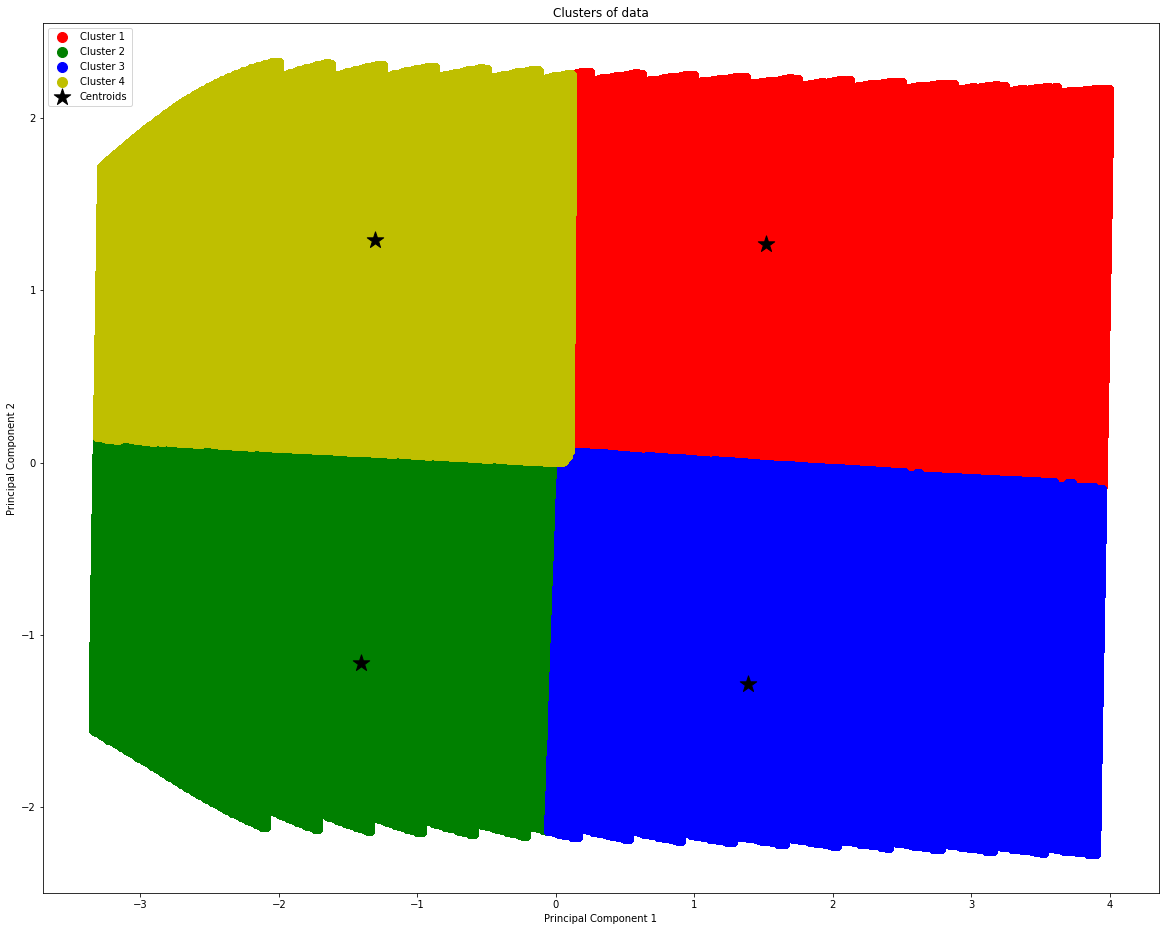

In [31]:
# Choose the elbow point as the best number of clusters
# Here it's assumed to be 4, replace with the value you find appropriate
k = 4

# Apply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

plt.figure(figsize=(20, 16))
# Range of colours to choose from
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
    # For every cluster, retrieve all the points in that cluster and draw them 
    plt.scatter(principalDf[kmeans.labels_ == i]['PC1'], principalDf[kmeans.labels_ == i]['PC2'], s=100, c=colors[i], label='Cluster ' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.title('Clusters of data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig("kmeans_clustering_whole_dataset_2.png", dpi=300, bbox_inches='tight')
plt.show()